# 1) BAGGING
#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('C:/Users/ADMIN/Desktop/python jupyter/DATA SCIENCE/CSV FILES/Movie_classification.csv')

In [10]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [12]:
df['Time_taken'].mean()

157.3914979757085

In [13]:
df['Time_taken'].fillna(value=df['Time_taken'].mean(),inplace=True)

In [14]:
df = pd.get_dummies(df,columns = ["3D_available","Genre"],drop_first=True)

In [15]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,True,False,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,False,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,False,True,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,True,False,True,False
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,False,False,True,False


In [16]:
X = df.drop(['Start_Tech_Oscar'],axis=1)
Y = df['Start_Tech_Oscar']

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier
clftree = DecisionTreeClassifier()

In [21]:
from sklearn.ensemble import BaggingClassifier

In [22]:
bag_clf = BaggingClassifier(estimator=clftree,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)

In [23]:
bag_clf.fit(X_train,Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [25]:
Y_pred = bag_clf.predict(X_test)
Y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [26]:
confusion_matrix(Y_test,Y_pred)

array([[27, 15],
       [14, 46]], dtype=int64)

In [27]:
accuracy_score(Y_test,Y_pred)

0.7156862745098039

# 2) RANDOM FOREST CLASSIFIER
### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [30]:
rf_clf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [31]:
Y_pred = rf_clf.predict(X_test)
Y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [32]:
confusion_matrix(Y_test,Y_pred)

array([[25, 17],
       [17, 43]], dtype=int64)

In [33]:
accuracy_score(Y_test,Y_pred)

0.6666666666666666

# GRID SEARCH CV
### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [34]:
from sklearn.model_selection import GridSearchCV 

In [35]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [36]:
params_grid = {"max_features":[4,5,6,7,8,9,10],
               "min_samples_split":[2,3,10]}

In [37]:
grid_search = GridSearchCV(rf_clf,params_grid,n_jobs=-1,cv=5,scoring='accuracy')

In [38]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [40]:
grid_search.best_params_

{'max_features': 5, 'min_samples_split': 2}

In [41]:
cvrf_clf = grid_search.best_estimator_

In [43]:
Y_pred = cvrf_clf.predict(X_test)
Y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [44]:
confusion_matrix(Y_test,Y_pred)

array([[23, 19],
       [12, 48]], dtype=int64)

In [45]:
accuracy_score(Y_test,Y_pred)

0.696078431372549

# 3) i) GRADIENT BOOSTING
### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,Y_train)

GradientBoostingClassifier()

In [48]:
Y_pred = gb_clf.predict(X_test)
Y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [49]:
confusion_matrix(Y_test,Y_pred)

array([[26, 16],
       [19, 41]], dtype=int64)

In [50]:
accuracy_score(Y_test,Y_pred)

0.6568627450980392

In [51]:
gb_clf1 = GradientBoostingClassifier(learning_rate=0.02,n_estimators=1000,max_depth=1)
gb_clf1.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [52]:
Y_pred = gb_clf1.predict(X_test)
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [53]:
confusion_matrix(Y_test,Y_pred)

array([[25, 17],
       [21, 39]], dtype=int64)

In [54]:
accuracy_score(Y_test,Y_pred)

0.6274509803921569

# ii) ADA BOOST
### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
ada_clf = AdaBoostClassifier(learning_rate=0.02,n_estimators=5000)

In [57]:
ada_clf.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [58]:
Y_pred = ada_clf.predict(X_test)
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [59]:
confusion_matrix(Y_test,Y_pred)

array([[23, 19],
       [19, 41]], dtype=int64)

In [60]:
accuracy_score(Y_test,Y_pred)

0.6274509803921569

In [63]:
ada_clf1 = AdaBoostClassifier(rf_clf,learning_rate=0.02,n_estimators=500)

In [64]:
ada_clf1.fit(X_train,Y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=250,
                                                    random_state=42),
                   learning_rate=0.02, n_estimators=500)

In [65]:
Y_pred = ada_clf1.predict(X_test)
Y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [66]:
confusion_matrix(Y_test,Y_pred)

array([[25, 17],
       [16, 44]], dtype=int64)

In [67]:
accuracy_score(Y_test,Y_pred)

0.6764705882352942

# iii) XG BOOST
### https://xgboost.readthedocs.io/en/latest/

In [68]:
import xgboost as xgb

In [69]:
xgb_clf = xgb.XGBClassifier(max_depth=5,n_estimators=10000,learning_rate=0.3,n_jobs=-1)

In [70]:
xgb_clf.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
Y_pred = xgb_clf.predict(X_test)
Y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [72]:
confusion_matrix(Y_test,Y_pred)

array([[22, 20],
       [17, 43]], dtype=int64)

In [73]:
accuracy_score(Y_test,Y_pred)

0.6372549019607843

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

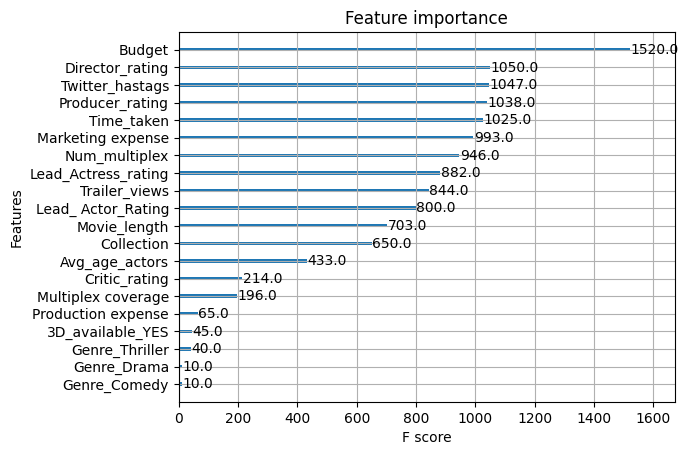

In [74]:
xgb.plot_importance(xgb_clf)

In [75]:
xgb_clf = xgb.XGBClassifier(n_estimators=500,learning_rate=0.1,n_jobs=-1,random_state=42)

In [76]:
param_test = {"max_depth":range(3,10,2),
              "gamma":[0.1,0.2,0.3],
              "subsample":[0.8,0.9],
              "colsample_bytree":[0.8,0.9],
              "reg_alpha":[1e-2,0.1,1]}

In [84]:
grid_search = GridSearchCV(xgb_clf,param_test,n_jobs=-1,cv=5,scoring='accuracy')

In [85]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=500,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [86]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.3,
 'max_depth': 7,
 'reg_alpha': 0.01,
 'subsample': 0.8}

In [87]:
cvxg_clf = grid_search.best_estimator_

In [88]:
Y_pred = cvxg_clf.predict(X_test)
Y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [89]:
confusion_matrix(Y_test,Y_pred)

array([[22, 20],
       [18, 42]], dtype=int64)

In [90]:
accuracy_score(Y_test,Y_pred)

0.6274509803921569